<a href="https://colab.research.google.com/github/mat-mot/Social-Network-Analysis/blob/main/SNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Engineering and Big Data Analysis


---


Course: Social Network

Topic: Final Project

Type: Social Network Data Engineering and Analysis

Author(s): Matin Motmaen, Adel Karimi

URL: https://github.com/mat-mot/Social-Network-Analysis.git



---



# **Import Basic Libraries**
Here we import the basic libraries, although in the process of project implementation, running the infrastructure, and after
installing the main prerequisites or wherever necessary, we will import other necessary libraries in the required section.
Since, several system environment variables need to be defined for the programs to work correctly, we use the os library. Python
OS module provides the facility to establish the interaction between the user and the operating system. It offers many useful OS
functions that are used to perform OS-based tasks and get related information about operating system. The Python OS module
lets us work with the files and directories.

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")
import os
import json
import csv
import re
from datetime import date, datetime, timezone
# miscellaneous
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## **Java (JDK)**
The Java JDK is essential to correctly run Java applications on various platforms . The JDK also supports the OpenJDK community,
which is an open source project that develops and maintains the Java SE. After installing Java (JDK), we need to define JAVA_HOME
variable for Java Virtual Machine (JVM).

In [ ]:
def install_java():
  import os
  # install java, it is not needed if installed
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

## **Config info**

In [ ]:
# Spark config
spark_session_appname = "StreamDataAnalysis"
# Kafka config
kafka_topic_name = "data-stream"
kafka_bootstrap_servers = "******************************:9092"
# Elasticsearch credentials
elastic_credential = {}
elastic_credential["server_host"] = "http://******************************"
elastic_credential["server_port"] = "9200"
elastic_credential["username"] = "******************************"
elastic_credential["password"] = "******************************"
elastic_credential["cloud_id"] = "******************************"

## **Apache Spark**
Apache Spark is a multi-language engine for data engineering, data science, and machine learning on single-node machines or
clusters. It was originally developed at the University of California, Berkeley and later donated to the Apache Software Foundation.
It can process data in batches or real-time streams, execute fast SQL queries, train machine learning algorithms, and integrate with
various frameworks and storage systems. It is based on the concept of resilient distributed datasets (RDDs), which are fault-tolerant
collections of data items distributed over a cluster of machines. Spark manages the workflow as a directed acyclic graph (DAG) of
operations on RDDs.

In [ ]:
def install_pyspark():
  # install package related to Spark
  !pip install -q pyspark

def init_pyspark(appname = None):
  # import Apache Spark or PySpark packages
  from pyspark import SparkContext, SQLContext
  from pyspark.sql import SparkSession
  #import findspark
  #findspark.init()
  #findspark.find()
  # building a spark session
  #sc = SparkContext()
  #spark = SQLContext(sc)
  spark_session_appname = "StreamDataAnalysis"
  if appname != None:
    session_appname = appname
  # building a spark session
  spark = SparkSession.builder.master("local[*]").appName(session_appname).getOrCreate()
  # property used to format output tables better
  #spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
  # single cluster information
  print(spark)
  return spark


## **Apache Kafka**
Apache Kafka is a pub-sub (publish-subscribe) messaging service and a powerful queue that can manage a large amount of data
and allows you to send messages from one terminal to another. Kafka may be used to accept messages both offline and online. To
avoid data loss, Kafka messages are stored on a disc and replicated throughout the cluster. The Kafka messaging system is based
on the ZooKeeper synchronization service. For real-time streaming data processing, it works well with Apache Storm and Spark.
This data engineering project entails publishing the real-time streaming data into Kafka using the PublishKafka processor. Once the
data is stored in Kafka topic, it needs to be streamed into PySpark for further processing.

In [ ]:
def install_kafka():
  # download and install Apache Kafka
  !wget -q https://archive.apache.org/dist/kafka/3.4.0/kafka_2.13-3.4.0.tgz
  # unzip the kafka file to the current folder
  !tar -xvf kafka_2.13-3.4.0.tgz
  # rename for user-friendly and better readability
  !mv kafka_2.13-3.4.0 kafka
  !pip install kafka-python

def init_kafka(topicnames = None):
  topicnames = "data-stream"
  !./kafka/bin/zookeeper-server-start.sh -daemon ./kafka/config/zookeeper.properties
  !./kafka/bin/kafka-server-start.sh -daemon ./kafka/config/server.properties
  !echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
  !sleep 10
  !ps -ef | grep kafka
  # create the kafka topics with the following specs
  !./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic data-stream
  !./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 2 --topic data-stream2
  # get describing the topic for details on the configuration
  !./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic data-stream
  !./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic data-stream2

## **Apache Cassandra**
Apache Cassandra is a highly-scalable partitioned row store. Cassandra or Kassandra, in Greek mythology, the daughter of Priam,
the last king of Troy, and his wife Hecuba

In [ ]:
def install_cassandra():
  import os
  # download and install cassandra
  !wget -q https://archive.apache.org/dist/cassandra/4.0.9/apache-cassandra-4.0.9-bin.tar.gz
  # unzip the cassandra file to the current folder
  !tar -xzvf apache-cassandra-4.0.9-bin.tar.gz
  # rename for user-friendly and better readability
  !mv apache-cassandra-4.0.9 cassandra
  # set cassandra path to system path environment
  os.environ["CASSANDRA_HOME"] = "/content/cassandra"
  !pip install cassandra-driver

def init_cassandra():
  pass

def get_cassandra_auth():
  pass



## **Elasticsearch**
On top of the Apache Lucene search framework, Elasticsearch is an open-source search engine. It is flexible, scalable, and simple to
use. Elasticsearch may be used to swiftly and almost instantly store, search, and analyze enormous volumes of data.

In [ ]:
def install_elastic():
  import os
  # download and install Elasticsearch
  !wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-8.8.0-linux-x86_64.tar.gz
  # unzip the elasticsearch file to the current folder
  !tar -xzvf elasticsearch-8.8.0-linux-x86_64.tar.gz
  # rename for user-friendly and better readability
  !mv elasticsearch-8.8.0 elasticsearch
  # set elasticsearch path to system path environment
  os.environ["ES_HOME"] = "/content/elasticsearch"
  !pip install elasticsearch

def init_elastic():
  !sudo chown -R daemon:daemon ./elasticsearch/
  !sudo -H -u daemon elasticsearch/bin/elasticsearch
  !./elasticsearch/bin/elasticsearch -d
  !echo "Waiting a while until Elasticsearch services are up and running..."
  !sleep 30
  # if we get 1 root & 2 daemon process then Elasticsearch instance has started successfully
  !ps -ef | grep elasticsearch

def get_elasticsearch_auth(elasticsearch_api_credential = None):
  # import Elasticsearch packages/driver
  from elasticsearch import helpers, Elasticsearch
  elasticsearch_api_credential = elastic_credential
  # setup the Elasticsearch client using credentials
  server_host = elasticsearch_api_credential["server_host"]
  server_port = elasticsearch_api_credential["server_port"]
  username = elasticsearch_api_credential["username"]
  password = elasticsearch_api_credential["password"]
  cloud_id = elasticsearch_api_credential["cloud_id"]
  elastic_server = f"{server_host}:{server_port}"
  # create the Elasticsearch client instance
  elasticsearch = Elasticsearch(cloud_id = cloud_id, basic_auth=(username, password))
  try:
    return elasticsearch
    # successful response
    print(elasticsearch.info())
    # {'name': 'instance-0000000000', 'cluster_name': ...}
  except Exception as e:
    print("Error : " + str(e))
    exit(1)

# **Step 1: Fetch Data(Offline)**
loading data from csv file in google drive

In [ ]:
# mount Google Drive to access the dataset
# from google.colab import drive
# drive.mount("/content/drive")

set path var

In [ ]:
dataset_name = 'dataset.csv'
data_seperator = ','
# file path on Google Drive
drive_file_path = f"/content/drive/My Drive/SNP/{dataset_name}"
# load data from csv to a dataframe.
# install_pyspark()
# spark = init_pyspark(spark_session_appname)
# raw_offline_tweets_df = spark.read.csv(drive_file_path, sep= data_seperator, header = True, inferSchema = True)

## **Source of dataset**

https://console.apify.com/actors/wHMoznVs94gOcxcZl/console

using a bot in apify to scram tweet from tweeter

## **Json Data from Colab files**
loading json data from files in colab
output data is :
1-json object
2-pandas data frame

In [ ]:

dataset_name = 'dataset.json'
drivefilepath = f'/content/{dataset_name}'
json_tweet_line = []
with open(drivefilepath, 'r', encoding='utf-8-sig') as ds:
  json_tweet_line = json.load(ds)

def get_data_to_json_object():
  return json_tweet_line

def get_data_to_pd_df():
  return pd.json_normalize(json_tweet_line)

## **Data Preprocessing**
Before sending the data collected from online sources in the distributed communication channel, we select only the necessary
parts and send them in the message broker channel like Kafka. This makes system and network resources to be used optimally.
Therefore, we define a function that selects from the data model only the relevant fields that we announced earlier and ignores the
other fields of JSON Tweet

In [ ]:
def process_tweet(tweet, is_json = False):
  import json
  from datetime import date, datetime, timezone
  from geopy.geocoders import Nominatim
  raw_tweet = ""
  result = {}
  if is_json :
    raw_tweet = json.loads(tweet)
  else :
    raw_tweet = tweet
  """
  * id +
  * created_at +
  * text +
  * hashtags +
  * user_id +
  * user_name +
  * user_screen_name +
  * geo (lat, long)
  * like_count +
  * retweet_count +
  * lang +
  """
  #"extended_tweet" in rawtweet
  result["id"] = raw_tweet["id"]
  result["user_id"] = raw_tweet["user"]["id"]
  result["user_name"] = raw_tweet["user"]["screen_name"]
  result["user_display_name"] = raw_tweet["user"]["name"]
  if tweet["truncated"] == True and hasattr(raw_tweet, "extended_tweet"):
    result["text"] = raw_tweet["extended_tweet"]["full_text"]
    result["hashtags"] = [hashtag["text"] for hashtag in raw_tweet["extended_tweet"]["entities"]["hashtags"]]
    #if hasattr(raw_tweet, "retweeted_status"): #=> check if retweet
  else:
    result["text"] = raw_tweet["text"]
    result["hashtags"] = [hashtag["text"] for hashtag in raw_tweet["entities"]["hashtags"]]

  result["lat"] = 0
  result["long"] = 0
  result["location_name"] = raw_tweet["user"]["location"] #=> user location in profile
  #result["country"] = raw_tweet["place"]["country"] # tweet country in profile
  result["like_count"] = raw_tweet["favorite_count"] #=> like count
  result["retweet_count"] = raw_tweet["retweet_count"] #=> retweet count
  #result["reply_count"] = raw_tweet["reply_count"] #=> comment count
  result["lang"] = raw_tweet["lang"]
  # example tweet datetime: Mon Jul 17 07:34:07 +0000 2023
  # parse tweet date by "%a %b %d %H:%M:%S +0000 %Y" or "%a %b %d %H:%M:%S %z %Y"
  # then formate it to "%Y-%m-%d %H:%M:%S", output: 2023-07-17 07:34:07
  result["created_at"] = datetime.strptime(raw_tweet["created_at"],"%a %b %d %H:%M:%S %z %Y").strftime("%Y-%m-%d %H:%M:%S")
  response = json.dumps(result, ensure_ascii = False)
  return response

### **customize needed cols**

In [ ]:
strr = ''
for a in get_data_to_json_object()[0].keys():
  strr += a + '\n'
print(strr)
print(get_data_to_json_object()[0]['total_tweets'])
count = 0
for tweet in get_data_to_json_object():
  if tweet['quotes'] == 0:
    count += 1
print(count)

pddata = get_data_to_pd_df()
sortcols = pddata[['tweet_id', 'username','fullname','text',
'timestamp',
'in_reply_to',
'replies',
'retweets',
'quotes',
'likes',
'tweet_links',
'tweet_hashtags',
'tweet_mentions',
'url',
# 'tweet_avatar',
# 'images',
# 'query'
]]
# print(process_tweet(get_data_to_json_object(), False))

tweet_avatar
tweet_id
url
query
text
username
fullname
timestamp
language
in_reply_to
replies
retweets
quotes
images
likes
banner_image
total_tweets
num_following
num_followers
total_likes
tweet_links
tweet_hashtags
tweet_mentions

None
1491


#### cols output

In [ ]:
sortcols

,tweet_id,username,fullname,text,timestamp,in_reply_to,replies,retweets,quotes,likes,tweet_links,tweet_hashtags,tweet_mentions,url
0,1747887339903574082,@WIONews,WION,Did China hide #COVID19 details from the world...,2024-01-18 07:43:00+00:00,[],0,0,0,0,[http://wionews.com/videos],[#COVID19],[ShivanChanana],https://twitter.com/WIONews/status/17478873399...
1,1747887168045945134,@Kotsobar,Konstantinos covid19,Η γυναίκα για πρώτη φορά κάνει ζωάρα!!!! Βλέπω...,2024-01-18 07:42:00+00:00,[@2Cowman57],0,0,0,0,[],[],[],https://twitter.com/Kotsobar/status/1747887168...
2,1747887052937449858,@Kayden_Pub,МС,Я и первый не смотрела.,2024-01-18 07:42:00+00:00,[@Covid19______],0,0,0,0,[],[],[],https://twitter.com/Kayden_Pub/status/17478870...
3,1747887018963517645,@profilersystem,@profiler,They will do everything in their power to stop...,2024-01-18 07:41:00+00:00,[],1,0,0,0,[],"[#Trump, #NikkiHaley2024, #Republican, #COVID1...",[],https://twitter.com/profilersystem/status/1747...
4,1747886832937758775,@asifras362,Asif Rashid,India Logs 305 New Covid-19 Cases\n#COVID19 #I...,2024-01-18 07:41:00+00:00,[],0,0,0,1,[],"[#COVID19, #India]",[],https://twitter.com/asifras362/status/17478868...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,1747794459658469442,@CarloMontalvan,Carlos Montalván,Eis o problema que até agora as principais lid...,2024-01-18 01:34:00+00:00,"[@opropriofaka, @gcamarotti]",0,0,0,0,[],[],[],https://twitter.com/CarloMontalvan/status/1747...
1532,1747794280616448424,@Eddie27Evans,Eddie Haywood,Reality is not as interesting to some people...🙄,2024-01-18 01:33:00+00:00,"[@BathroomReports, @COVID19_disease]",1,0,0,3,[],[],[],https://twitter.com/Eddie27Evans/status/174779...
1533,1747794261033341003,@oobaka2024,野獣の理性,SARS‐CoV-2（COVID19）もそうでしたが、それらが議論された後\n「コロナパンデ...,2024-01-18 01:33:00+00:00,[],0,0,0,0,[],[],[],https://twitter.com/oobaka2024/status/17477942...
1534,1747794019814383708,@bemneto31,Pensamento,"Catarrada na cara ,baforada 2024, #covid19 tur...",2024-01-18 01:32:00+00:00,[],0,0,0,0,[],[#covid19],[],https://twitter.com/bemneto31/status/174779401...


# **Step 2: calculate degree centrality of network graph**

The code creates a graph using the NetworkX library in Python. The graph is created from a JSON object that is generated using the `get_data_to_json_object()` function. The JSON object contains information about users and their replies.

The graph is created by first initializing an empty JSON object with the required fields. The `user_id_name` dictionary is then created to store the usernames of the users in the graph. The `search()` function is used to check if a username already exists in the dictionary. If not, the username is added to the dictionary.

The `count` variable is used to keep track of the number of nodes in the graph. The `dt` variable is used to store the JSON object returned by `get_data_to_json_object()`. The `for` loop is used to iterate over the JSON object and add the nodes to the graph.

The `nodelist` variable is used to store the nodes in the graph. The `for` loop is used to iterate over the `user_id_name` dictionary and add the nodes to the `nodelist`.

The `edgelist` variable is used to store the edges in the graph. The `for` loop is used to iterate over the JSON object and add the edges to the `edgelist`.

Finally, the graph is created using the `node_link_graph()` function of NetworkX. The degree centrality of the graph is then calculated using the `degree_centrality()` function.


In [ ]:
graph_json = {
    "directed": False,
    "multigraph": False,
    "graph": {},
    "nodes": [
    ],
    "links": [
    ]
}

user_id_name = {}
dt = get_data_to_json_object()


def search(dic, searchFor):
    for v in dic.values():
        if searchFor == v:
            return True
    return False

def getkey(dic, searchFor):
    for k in dic:
        if searchFor == dic.get(k):
            return k
    return None

count = len(user_id_name)
for tmp in dt:
  if not search(user_id_name, tmp['username']):
    user_id_name[count] = tmp['username']
    count += 1
for tmp in dt:
  for tp in tmp['in_reply_to']:
    if not search(user_id_name, tp):
      user_id_name[count] = tp
      count += 1

nodelist = []

for key in user_id_name:
  nodelist.append({'id': key, 'label': user_id_name.get(key)})

edgelist = []

for tmp in dt:
  for tp in tmp['in_reply_to']:
    edgelist.append({"source": getkey(user_id_name, tmp['username']), "target": getkey(user_id_name, tp)})

graph_json['nodes'] = nodelist
graph_json['links'] = edgelist


graph = nx.node_link_graph(graph_json)

degree_centrality = nx.degree_centrality(graph)

betweenness_centrality = nx.betweenness_centrality(graph)

closeness_centrality = nx.closeness_centrality(graph)

eigenvector_centrality = nx.eigenvector_centrality(graph)

pagerank = nx.pagerank(graph)


## **save created grap**
save with edge and node csv file

In [ ]:


def save_to_csv(graph):
    df = pd.DataFrame(graph.edges, columns=['source', 'target'])
    df.to_csv('edges.csv', index=False)
    df = pd.DataFrame(graph.nodes, columns=['id'])
    df.to_csv('nodes.csv', index=False)


save_to_csv(graph)

### **output a json of graph**

In [ ]:
graph_json

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0, 'label': '@WIONews'},
  {'id': 1, 'label': '@Kotsobar'},
  {'id': 2, 'label': '@Kayden_Pub'},
  {'id': 3, 'label': '@profilersystem'},
  {'id': 4, 'label': '@asifras362'},
  {'id': 5, 'label': '@BagaiDr'},
  {'id': 6, 'label': '@Ticinonline'},
  {'id': 7, 'label': '@PollRackham'},
  {'id': 8, 'label': '@DrCappa'},
  {'id': 9, 'label': '@BathroomReports'},
  {'id': 10, 'label': '@smallblue11'},
  {'id': 11, 'label': '@realityspks'},
  {'id': 12, 'label': '@MahaHealthIEC'},
  {'id': 13, 'label': '@BlueRepublik'},
  {'id': 14, 'label': '@seanrcallaghan'},
  {'id': 15, 'label': '@PocketSamson'},
  {'id': 16, 'label': '@MamaPatriot6'},
  {'id': 17, 'label': '@Chinavirus_2020'},
  {'id': 18, 'label': '@kypioskreas'},
  {'id': 19, 'label': '@MBrandLA'},
  {'id': 20, 'label': '@timmy_gusto'},
  {'id': 21, 'label': '@Kathlee62660615'},
  {'id': 22, 'label': '@DepravedAngel'},
  {'id': 23, 'label': '@TEXASMOJOWOLF'},
  

### **output the num of node and link in graph**

In [ ]:
print(graph)

Graph with 2291 nodes and 1383 edges



##   (Degree) - گره‌هایی با بیشترین

Based on centrality, introduce 5 top nodes

In [ ]:
top5centrality = sorted(degree_centrality.items(), key=lambda x:x[1])
top5centrality[len(top5centrality)-5:len(top5centrality)]


[(1269, 0.00960698689956332),
 (55, 0.010917030567685589),
 (106, 0.014410480349344978),
 (390, 0.017903930131004366),
 (132, 0.026200873362445417)]


##   (Betweenness) - گره‌هایی با بیشترین


In [ ]:
# betweenness_centrality
top5_betweenness = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:5]
top5_betweenness

[(132, 0.000675339243505583),
 (106, 0.0006551172209599356),
 (55, 0.0005438960969588748),
 (1574, 0.0005032612780699797),
 (689, 0.00032698628908716645)]


##   (Closeness) - گره‌هایی با بیشترین


In [ ]:

top5_closeness = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)[:5]
top5_closeness

[(132, 0.026200873362445413),
 (390, 0.017903930131004366),
 (106, 0.016473019338739864),
 (1574, 0.014878856176926327),
 (1355, 0.013210524384426258)]


##   (Eigenvector) - گره‌هایی با بیشترین


In [ ]:

top5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x:x[1], reverse=True)[:5]
top5_eigenvector


[(132, 0.7070776860241046),
 (1355, 0.09129064237440794),
 (1356, 0.09129064237440794),
 (1357, 0.09129064237440794),
 (1358, 0.09129064237440794)]


## (PageRank) - گره‌هایی با بیشترین

In [ ]:

top5_pagerank = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)[:5]
top5_pagerank


[(132, 0.01519783058818481),
 (390, 0.010478342749119926),
 (106, 0.008106168955306199),
 (55, 0.006052657401239254),
 (1269, 0.005724647292266173)]

## **output importance of graph**

In [ ]:

top5importance = sorted(dict(graph.degree()).items(), key=lambda x:x[1])
top5importance[len(top5importance)-5:len(top5importance)]


[(1269, 22), (55, 25), (106, 33), (390, 41), (132, 60)]

## **Graph Schema**

in following part we show a grap schema

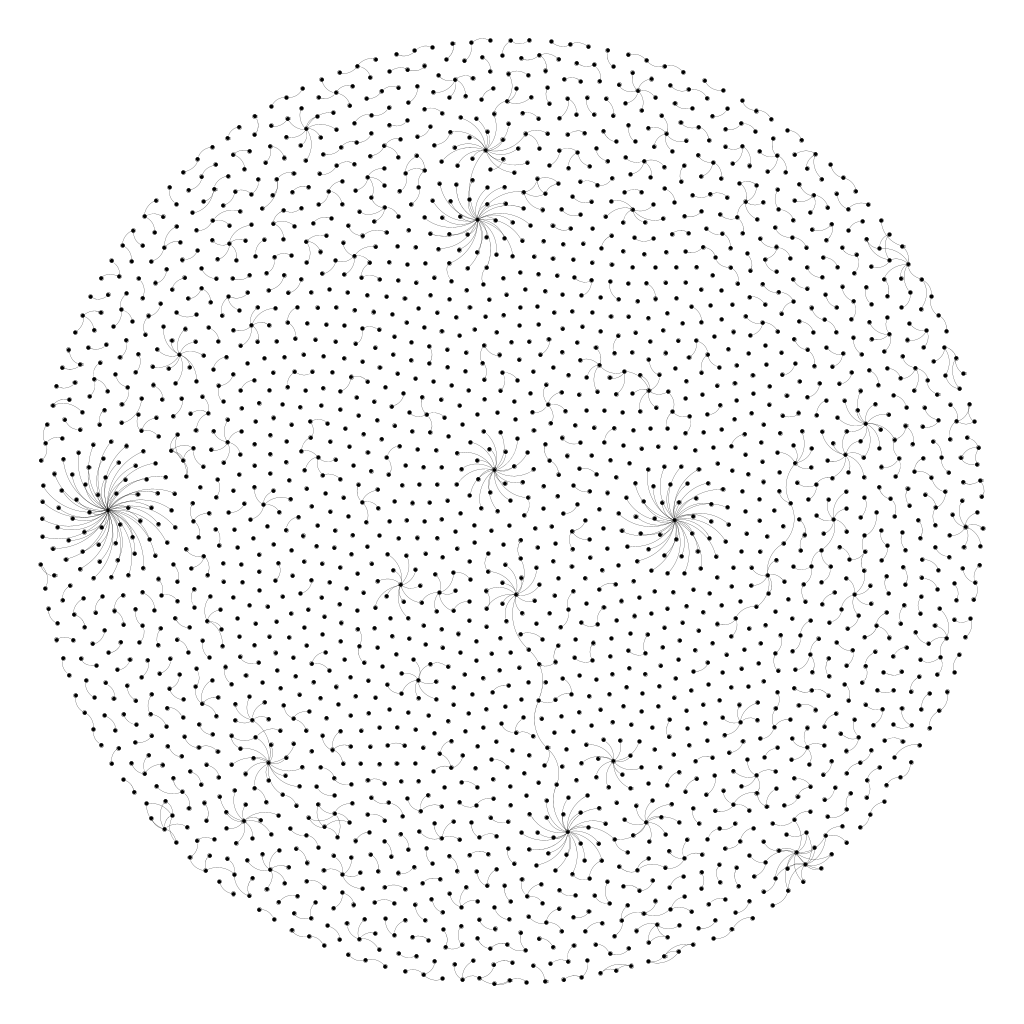

# **Step 3: Specify 25 key words and determine how much of the words are positive and how much are negative**

In [ ]:
df = get_data_to_pd_df()
df

,tweet_avatar,tweet_id,url,query,text,username,fullname,timestamp,language,in_reply_to,...,images,likes,banner_image,total_tweets,num_following,num_followers,total_likes,tweet_links,tweet_hashtags,tweet_mentions
0,https://pbs.twimg.com/profile_images/875597226...,1747887339903574082,https://twitter.com/WIONews/status/17478873399...,covid19 -filter:nativeretweets,Did China hide #COVID19 details from the world...,@WIONews,WION,2024-01-18 07:43:00+00:00,None,[],...,[],0,None,None,None,None,None,[http://wionews.com/videos],[#COVID19],[ShivanChanana]
1,https://pbs.twimg.com/profile_images/148191254...,1747887168045945134,https://twitter.com/Kotsobar/status/1747887168...,covid19 -filter:nativeretweets,Η γυναίκα για πρώτη φορά κάνει ζωάρα!!!! Βλέπω...,@Kotsobar,Konstantinos covid19,2024-01-18 07:42:00+00:00,None,[@2Cowman57],...,[],0,None,None,None,None,None,[],[],[]
2,https://pbs.twimg.com/profile_images/174772991...,1747887052937449858,https://twitter.com/Kayden_Pub/status/17478870...,covid19 -filter:nativeretweets,Я и первый не смотрела.,@Kayden_Pub,МС,2024-01-18 07:42:00+00:00,None,[@Covid19______],...,[],0,None,None,None,None,None,[],[],[]
3,https://pbs.twimg.com/profile_images/147483758...,1747887018963517645,https://twitter.com/profilersystem/status/1747...,covid19 -filter:nativeretweets,They will do everything in their power to stop...,@profilersystem,@profiler,2024-01-18 07:41:00+00:00,None,[],...,[],0,None,None,None,None,None,[],"[#Trump, #NikkiHaley2024, #Republican, #COVID1...",[]
4,https://pbs.twimg.com/profile_images/168707898...,1747886832937758775,https://twitter.com/asifras362/status/17478868...,covid19 -filter:nativeretweets,India Logs 305 New Covid-19 Cases\n#COVID19 #I...,@asifras362,Asif Rashid,2024-01-18 07:41:00+00:00,None,[],...,[],1,None,None,None,None,None,[],"[#COVID19, #India]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,https://pbs.twimg.com/profile_images/454135021...,1747794459658469442,https://twitter.com/CarloMontalvan/status/1747...,covid19 -filter:nativeretweets,Eis o problema que até agora as principais lid...,@CarloMontalvan,Carlos Montalván,2024-01-18 01:34:00+00:00,None,"[@opropriofaka, @gcamarotti]",...,[],0,None,None,None,None,None,[],[],[]
1532,https://pbs.twimg.com/profile_images/146770028...,1747794280616448424,https://twitter.com/Eddie27Evans/status/174779...,covid19 -filter:nativeretweets,Reality is not as interesting to some people...🙄,@Eddie27Evans,Eddie Haywood,2024-01-18 01:33:00+00:00,None,"[@BathroomReports, @COVID19_disease]",...,[],3,None,None,None,None,None,[],[],[]
1533,https://abs.twimg.com/sticky/default_profile_i...,1747794261033341003,https://twitter.com/oobaka2024/status/17477942...,covid19 -filter:nativeretweets,SARS‐CoV-2（COVID19）もそうでしたが、それらが議論された後\n「コロナパンデ...,@oobaka2024,野獣の理性,2024-01-18 01:33:00+00:00,None,[],...,[],0,None,None,None,None,None,[],[],[]
1534,https://pbs.twimg.com/profile_images/161257103...,1747794019814383708,https://twitter.com/bemneto31/status/174779401...,covid19 -filter:nativeretweets,"Catarrada na cara ,baforada 2024, #covid19 tur...",@bemneto31,Pensamento,2024-01-18 01:32:00+00:00,None,[],...,[],0,None,None,None,None,None,[],[#covid19],[]


## **Import lib for process**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
import os
from collections import Counter
import string
from nltk import PorterStemmer, WordNetLemmatizer, lm
from regex import match as re_match
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## **process tweet text**

### **preprocess tweet**

In [ ]:
def preprocess_text(text):
  response = {}
  #tweet = p.clean(tweet)
  # make all words in lowercase
  text = text.lower()
  # get all hashtags
  hashtags = re.findall(r"#\w+", text)
  hashtags = Counter(hashtags).most_common()[:6]
  response["hashtags"] = hashtags
  # remove links
  text = re.sub(r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+(/\S+)?|\S+\.com\S+", "", text)
  # remove the hashtags and mentions
  text = re.sub(r"#\w+|@\w+", "", text)
  wp = re.compile('[%s]' % re.escape(string.punctuation))
  text = wp.sub(r'' , text)
  # remove Emoji patterns, emoticons, symbols & pictographs, transport & map symbols, flags (iOS), etc
  webpattern = re.compile("["
                              u"\U0001F600-\U0001F64F"
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F680-\U0001F6FF"
                              u"\U0001F1E0-\U0001F1FF"
                              u"\U00002500-\U00002BEF"
                              u"\U00002702-\U000027B0"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U00010000-\U0010ffff"
                              u"\u2640-\u2642"
                              u"\u2600-\u2B55"
                              u"\u200d"
                              u"\u23cf"
                              u"\u23e9"
                              u"\u231a"
                              u"\ufe0f"
                              u"\u3030"
                              "]+", flags=re.UNICODE)
  text = webpattern.sub(r'', text)
  response["preprocess_text"] = text
  return text


### **process tweet**

In [ ]:
def process_text(content, lang = "en", is_json = False, field_name = "tweet"):
  text = ""

  if is_json and field_name != None :
    json = json.loads(content)
    text = json["tweet"]
  else :
    text = content
    t = content

  if lang == "en" :
    c=0

  # remove stopwords
  def remove_stopwords(text, return_array = False):
      stop_words = set(stopwords.words("english"))
      word_tokens = word_tokenize(text)
      filtered_text = [word for word in word_tokens if word not in stop_words]
      return filtered_text if return_array else " ".join(filtered_text)

  # stem words in the list of tokenized words
  def stem_words(text, return_array = False):
      stemmer = PorterStemmer()
      word_tokens = word_tokenize(text)
      stems = [stemmer.stem(word) for word in word_tokens]
      return stems if return_array else " ".join(stems)

  # lemmatize string & provide context i.e. part-of-speech
  def lemmatize_word(text, return_array = False):
      lemmatizer = WordNetLemmatizer()
      word_tokens = word_tokenize(text)
      lemmas = [lemmatizer.lemmatize(word) for word in word_tokens]
      return lemmas if return_array else " ".join(lemmas)

  text = remove_stopwords(text)
  text = stem_words(text)
  text = lemmatize_word(text)

  return text

### **analyze sentiments of tweet**

In [ ]:
def analyze_sentiment(content, lang = "en", is_json = False, field_name = "tweet"):
  #import pdb
  #pdb.set_trace()

  text = ""
  sentiment_status = ""
  text_sentiment1 = ""
  text_sentiment2 = ""


  if is_json and field_name != None :
    json = json.loads(content)
    text = json["tweet"]
  else :
    text = content


  # get the polarity score
  """
  # calculate polarity using TextBlob analyser
  sentiment_result_textblob = TextBlob(text)
  polarity_textblob = sentiment_result_textblob.sentiment.polarity

  if polarity_textblob > 0:
    sentiment_status = "Positive"
  elif polarity_textblob < 0:
    sentiment_status = "Negative"
  elif polarity_textblob == 0:
    sentiment_status = "Neutral"
  """

  # calculate polarity using NLTK-Vader analyser
  vader_analyzer = SentimentIntensityAnalyzer()
  sentiment_result_vader = vader_analyzer.polarity_scores(text)

  if sentiment_result_vader["compound"] > 0:
    sentiment_status = "Positive"
  elif sentiment_result_vader["compound"] < 0:
    sentiment_status = "Negative"
  elif sentiment_result_vader["compound"] == 0:
    sentiment_status = "Neutral"

  return sentiment_status

In [ ]:
def analyze_text(content, lang = "en", is_json = False, field_name = "tweet"):

  text = ""
  result = {}

  if is_json and field_name != None :
    json = json.loads(content)
    text = json[field_name]
  else :
    text = content

  result["preprocess_text"] = preprocess_text(text)
  result["processed_text"] = process_text(result["preprocess_text"], lang = lang)
  result["sentiment_status"] = analyze_sentiment (result["preprocess_text"],
                                                  lang = lang,
                                                  is_json = is_json,
                                                  field_name = field_name)

  #, result["sentiment_polarity"]
  response = json.dumps(result, ensure_ascii = False)
  return response

### cleaning tweet text

In [ ]:

df['cleaned_tweet'] = np.vectorize(preprocess_text)(df["text"])
df['cleaned_tweet'] = df['cleaned_tweet'].apply(process_text)
df['cleaned_tweet']


0       china hide detail world late 2019 wuhan lab le...
1       η γυναίκα για πρώτη φορά κάνει ζωάρα βλέπω στο...
2                                  я и первый не смотрела
3       everyth power stop plan option lead parti alig...
4                          india log 305 new covid19 case
                              ...                        
1531    ei problema que até agora principai liderança ...
1532                               realiti interest peopl
1533                                 sars‐cov2covid19 x20
1534    catarrada na cara baforada 2024 turbinado vixi...
1535    easi covid rapid test put mouth 1015 min mix a...
Name: cleaned_tweet, Length: 1536, dtype: object

## **25 key words**

In [144]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>1]))
df['words'] = df['cleaned_tweet'].apply(word_tokenize)
words = [word for rawword in df['words'] for word in rawword ]
stp = set(stopwords.words('english'))
clean_word = [cw for cw in words if cw.lower() not in stp]

freq_word  = FreqDist(clean_word)
freq_word = sorted(freq_word.items(), key=lambda x:x[1], reverse=True)
# freq_word[:30]
pd.DataFrame(freq_word, columns = ['word', 'frequency'])[:25]


,word,frequency
0,viru,970
1,china,545
2,covid,497
3,de,325
4,covid19,305
5,la,241
6,que,220
7,trump,178
8,vaccin,176
9,el,172


### **frequency chart 1**

> Indented block



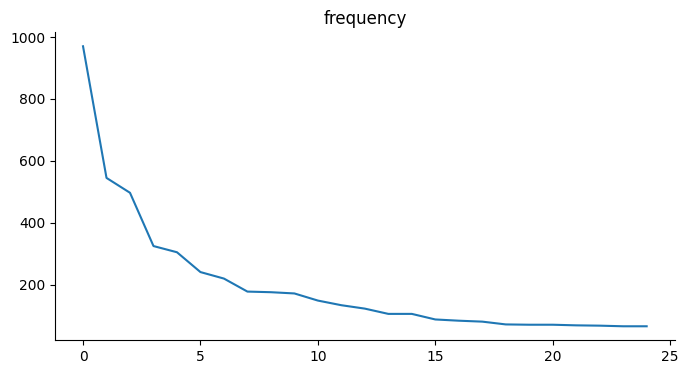

In [142]:
from matplotlib import pyplot as plt
_df_1['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

### **frequency chart 2**

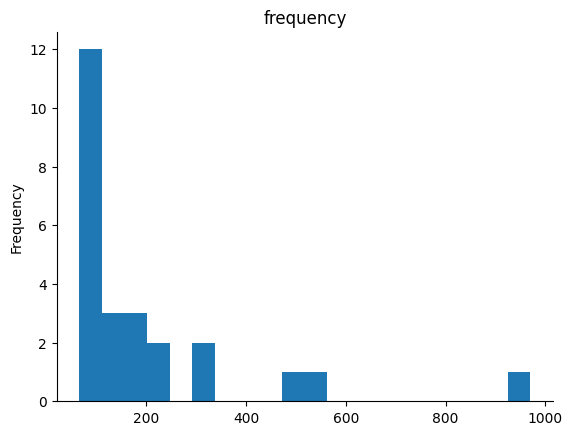

In [143]:
from matplotlib import pyplot as plt
_df_0['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **words pos or neg detect**

### **calculate word type**

In [147]:
# set(clean_word)

wt = pd.DataFrame(set(clean_word), columns=['word'])
wt['type'] = np.vectorize(analyze_sentiment)(wt['word'])
wt


,word,type
0,gaza,Neutral
1,romper,Neutral
2,keep,Neutral
3,februari,Neutral
4,given,Neutral
...,...,...
7277,ama,Neutral
7278,encierro,Neutral
7279,seq,Neutral
7280,aha,Neutral


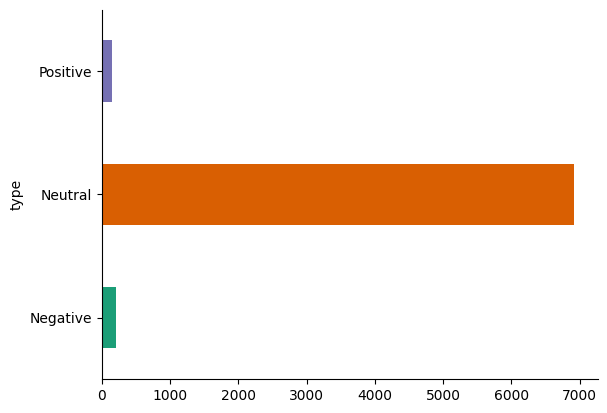

In [146]:
from matplotlib import pyplot as plt
import seaborn as sns
wt.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **calculate num of pos or neg or nat words**

In [ ]:
pos = 0
neg = 0
nat = 0

for tp in wt['type']:
  if tp == 'Positive':
    pos += 1
  elif tp == 'Negative':
    neg += 1
  else:
    nat += 1

print(f'Number of Positive words is: {pos}\nNumber of Natural words is: {nat}\nNumber of Negative words is: {neg}\n')

Number of Positive words is: 153
Number of Natural words is: 6919
Number of Negative words is: 210



# **Step 4: Specify active users and Degree of influence**

## **extracing acive user based on reply, retweet, likes, mentions, qoutes and other property**

In [148]:
#  print(sortcols.keys())
active_user = []
for val in sortcols.values:
  if val[5] or val[6] or val[7] or val[8] or val[9] or val[12]:
      active_user.append({'username': val[1],
       'in_reply_to': val[5],
       'replies': val[6],
       'retweets': val[7],
       'quotes': val[8],
       'likes': val[9],
       'tweet_mentions': val[12]})

active_user = pd.DataFrame(active_user)

active_user


,username,in_reply_to,replies,retweets,quotes,likes,tweet_mentions
0,@WIONews,[],0,0,0,0,[ShivanChanana]
1,@Kotsobar,[@2Cowman57],0,0,0,0,[]
2,@Kayden_Pub,[@Covid19______],0,0,0,0,[]
3,@profilersystem,[],1,0,0,0,[]
4,@asifras362,[],0,0,0,1,[]
...,...,...,...,...,...,...,...
1221,@matttttt187,[],0,4,0,9,[]
1222,@BathroomReports,"[@Eddie27Evans, @COVID19_disease]",1,0,0,2,[]
1223,@RGKahului,[@lisahepfner],0,0,0,0,[lisahepfner]
1224,@CarloMontalvan,"[@opropriofaka, @gcamarotti]",0,0,0,0,[]


## **Claculate score of each active user**

In [152]:

def score_calc(users):
  score = 0
  for user, i in zip(users.values, users.index):
    users['influence_rate'][i] = len(user[1]) + int(user[2]) + int(user[3]) + int(user[4]) + int(user[5]) + len(user[6])
    score += len(user[1]) + int(user[2]) + int(user[3]) + int(user[4]) + int(user[5]) + len(user[6])

  users['influence_rate'] = users['influence_rate'] / score

  return users
active_user = pd.DataFrame(active_user, columns=['username',	'in_reply_to',	'replies',	'retweets',	'quotes',	'likes',	'tweet_mentions', 'influence_rate'])
active_user = score_calc(active_user)
sort_active_user = active_user.sort_values(by='influence_rate', ascending=False)[['username', 'influence_rate']]
sort_active_user[:15]


,username,influence_rate
948,@lsferguson,0.333941
949,@ChrisCuomo,0.099600
890,@VPrasadMDMPH,0.028898
703,@houmanhemmati,0.022726
876,@TomFitton,0.019499
325,@BigBadDenis,0.018307
413,@CBSNews,0.013888
987,@noticiarepretel,0.011714
1097,@Dakota_150,0.011082
916,@virusketik,0.009469


### **Values chart**

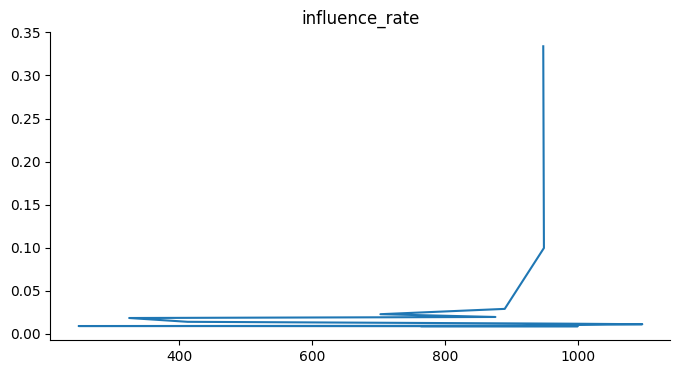

In [150]:
from matplotlib import pyplot as plt
_df_3['influence_rate'].plot(kind='line', figsize=(8, 4), title='influence_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

### **Distributions chart**

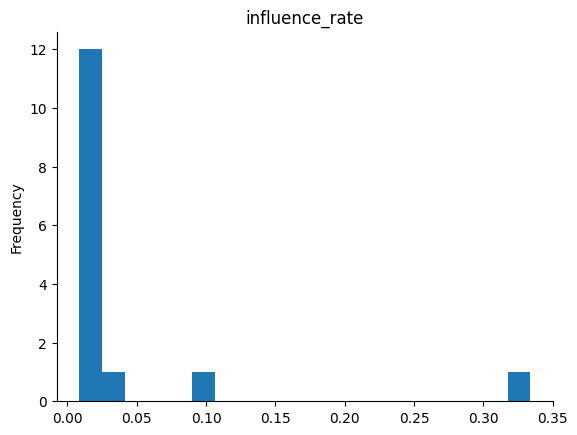

In [151]:
from matplotlib import pyplot as plt
_df_2['influence_rate'].plot(kind='hist', bins=20, title='influence_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Step 5: Active communities**


with networkx communities Was obtained

In [162]:
#calc user score
def score_user(tweets):
  score = 0
  for tw in tweets.values:
    score += len(tw[9]) + int(tw[10]) + int(tw[11]) + int(tw[12]) + int(tw[14]) + len(tw[22])

  return score

#user dic - id - username
userdic = dict()
for i in graph_json['nodes']:
  userdic[i['id']] = i['label']

userscore = dict()
for i in userdic:
  userscore[i] = score_user(df.loc[df['username'].str.contains(userdic[i])])


communities = nx.algorithms.community.greedy_modularity_communities(graph)



comdic = dict()
for i, community in enumerate(communities):
  score = 0
  for user in community:
    score += userscore[user]

  comdic[i] = (score, score/len(community))

sorted_community_list = sorted(comdic.items(), key=lambda x:x[1], reverse=True)

tmplist = list()
for i in sorted_community_list:
  tmplist.append((i[0], communities[i[0]], i[1][0], i[1][1]))

pdscl = pd.DataFrame(tmplist, columns=['communityID', 'users', 'total score', 'avg score'])

pdscl

,communityID,users,total score,avg score
0,203,"(2048, 722, 1007)",4969,1656.333333
1,21,"(1920, 1153, 834, 879, 755, 1012, 597, 2195, 3...",1470,147.000000
2,132,"(1321, 1222, 95)",418,139.333333
3,854,(957),412,412.000000
4,35,"(1521, 1522, 1523, 1524, 1525, 296, 349)",339,48.428571
...,...,...,...,...
962,959,(1231),0,0.000000
963,961,(1247),0,0.000000
964,964,(1254),0,0.000000
965,965,(1255),0,0.000000


## **Distributions-Schema**

### based communityID

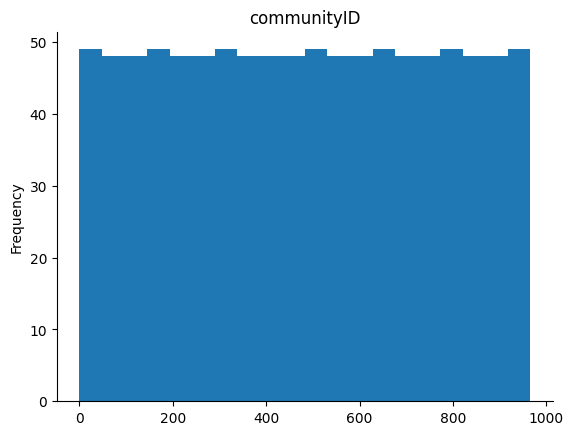

In [161]:
from matplotlib import pyplot as plt
pdscl['communityID'].plot(kind='hist', bins=20, title='communityID')
plt.gca().spines[['top', 'right',]].set_visible(False)

### based total score

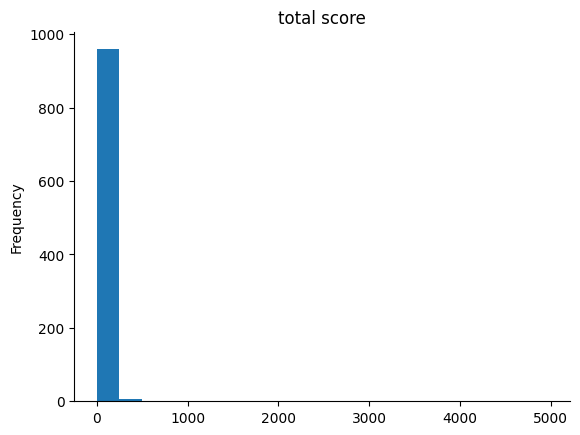

In [160]:
from matplotlib import pyplot as plt
pdscl['total score'].plot(kind='hist', bins=20, title='total score')
plt.gca().spines[['top', 'right',]].set_visible(False)

### based avg score

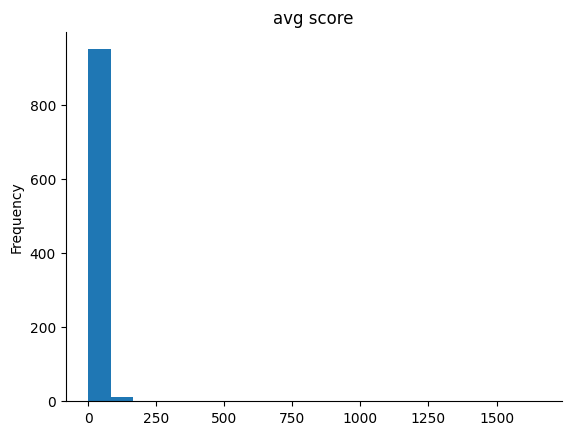

In [159]:
from matplotlib import pyplot as plt
pdscl['avg score'].plot(kind='hist', bins=20, title='avg score')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **2-d distributions-Schema**

### total score-communityID

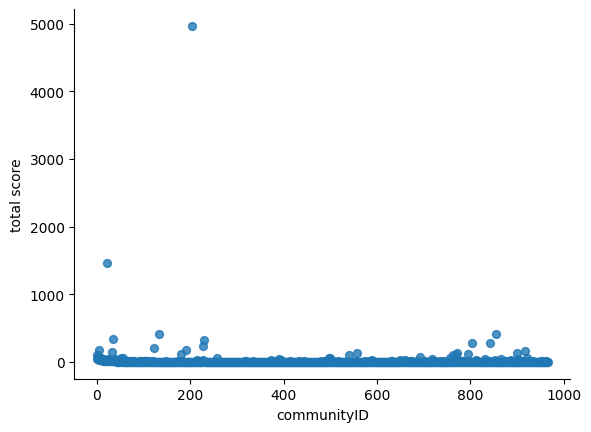

In [158]:
from matplotlib import pyplot as plt
pdscl.plot(kind='scatter', x='communityID', y='total score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### avg score-total score

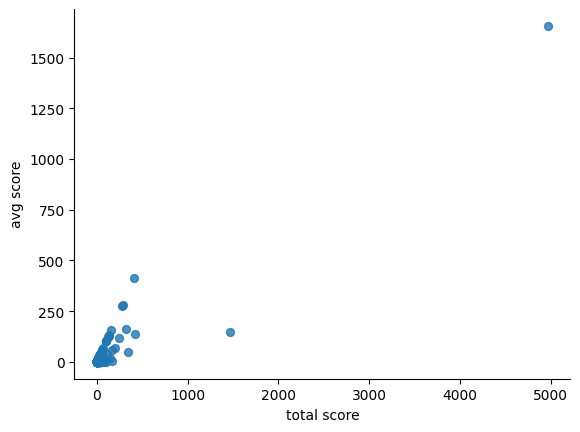

In [157]:
from matplotlib import pyplot as plt
pdscl.plot(kind='scatter', x='total score', y='avg score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Values-Schema**

### based communityID

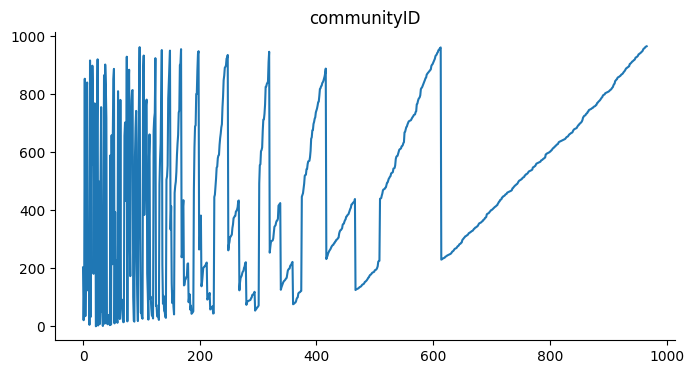

In [156]:
from matplotlib import pyplot as plt
pdscl['communityID'].plot(kind='line', figsize=(8, 4), title='communityID')
plt.gca().spines[['top', 'right']].set_visible(False)

### based total score

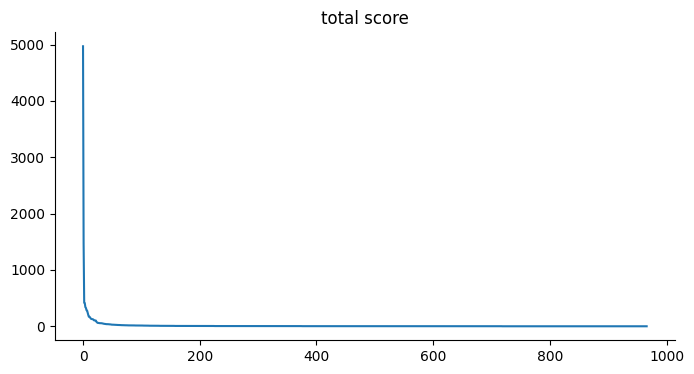

In [155]:
from matplotlib import pyplot as plt
pdscl['total score'].plot(kind='line', figsize=(8, 4), title='total score')
plt.gca().spines[['top', 'right']].set_visible(False)

### based avg score

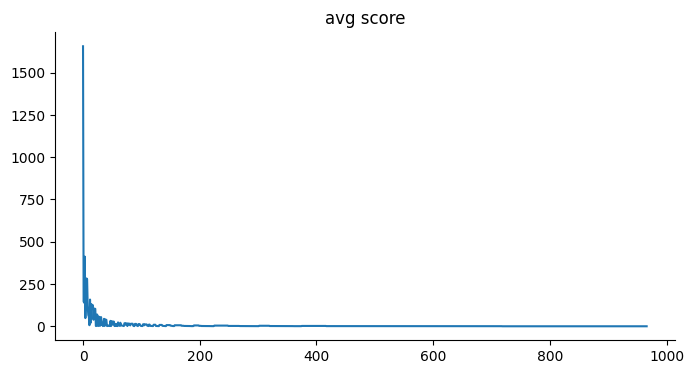

In [154]:
from matplotlib import pyplot as plt
pdscl['avg score'].plot(kind='line', figsize=(8, 4), title='avg score')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Step 6: ElasticSearch and Kibana**

data frame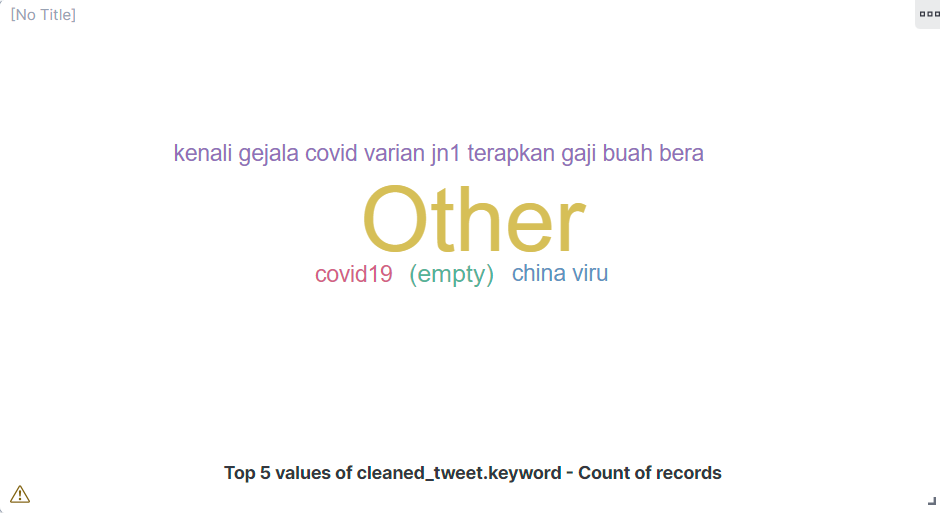

In [88]:
df

,tweet_avatar,tweet_id,url,query,text,username,fullname,timestamp,language,in_reply_to,...,banner_image,total_tweets,num_following,num_followers,total_likes,tweet_links,tweet_hashtags,tweet_mentions,cleaned_tweet,words
0,https://pbs.twimg.com/profile_images/875597226...,1747887339903574082,https://twitter.com/WIONews/status/17478873399...,covid19 -filter:nativeretweets,Did China hide #COVID19 details from the world...,@WIONews,WION,2024-01-18 07:43:00+00:00,None,[],...,None,None,None,None,None,[http://wionews.com/videos],[#COVID19],[ShivanChanana],china hide detail world late 2019 wuhan lab le...,"[china, hide, detail, world, late, 2019, wuhan..."
1,https://pbs.twimg.com/profile_images/148191254...,1747887168045945134,https://twitter.com/Kotsobar/status/1747887168...,covid19 -filter:nativeretweets,Η γυναίκα για πρώτη φορά κάνει ζωάρα!!!! Βλέπω...,@Kotsobar,Konstantinos covid19,2024-01-18 07:42:00+00:00,None,[@2Cowman57],...,None,None,None,None,None,[],[],[],γυναίκα για πρώτη φορά κάνει ζωάρα βλέπω στο φ...,"[γυναίκα, για, πρώτη, φορά, κάνει, ζωάρα, βλέπ..."
2,https://pbs.twimg.com/profile_images/174772991...,1747887052937449858,https://twitter.com/Kayden_Pub/status/17478870...,covid19 -filter:nativeretweets,Я и первый не смотрела.,@Kayden_Pub,МС,2024-01-18 07:42:00+00:00,None,[@Covid19______],...,None,None,None,None,None,[],[],[],первый не смотрела,"[первый, не, смотрела]"
3,https://pbs.twimg.com/profile_images/147483758...,1747887018963517645,https://twitter.com/profilersystem/status/1747...,covid19 -filter:nativeretweets,They will do everything in their power to stop...,@profilersystem,@profiler,2024-01-18 07:41:00+00:00,None,[],...,None,None,None,None,None,[],"[#Trump, #NikkiHaley2024, #Republican, #COVID1...",[],everyth power stop plan option lead parti alig...,"[everyth, power, stop, plan, option, lead, par..."
4,https://pbs.twimg.com/profile_images/168707898...,1747886832937758775,https://twitter.com/asifras362/status/17478868...,covid19 -filter:nativeretweets,India Logs 305 New Covid-19 Cases\n#COVID19 #I...,@asifras362,Asif Rashid,2024-01-18 07:41:00+00:00,None,[],...,None,None,None,None,None,[],"[#COVID19, #India]",[],india log 305 new covid19 case,"[india, log, 305, new, covid19, case]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,https://pbs.twimg.com/profile_images/454135021...,1747794459658469442,https://twitter.com/CarloMontalvan/status/1747...,covid19 -filter:nativeretweets,Eis o problema que até agora as principais lid...,@CarloMontalvan,Carlos Montalván,2024-01-18 01:34:00+00:00,None,"[@opropriofaka, @gcamarotti]",...,None,None,None,None,None,[],[],[],ei problema que até agora principai liderança ...,"[ei, problema, que, até, agora, principai, lid..."
1532,https://pbs.twimg.com/profile_images/146770028...,1747794280616448424,https://twitter.com/Eddie27Evans/status/174779...,covid19 -filter:nativeretweets,Reality is not as interesting to some people...🙄,@Eddie27Evans,Eddie Haywood,2024-01-18 01:33:00+00:00,None,"[@BathroomReports, @COVID19_disease]",...,None,None,None,None,None,[],[],[],realiti interest peopl,"[realiti, interest, peopl]"
1533,https://abs.twimg.com/sticky/default_profile_i...,1747794261033341003,https://twitter.com/oobaka2024/status/17477942...,covid19 -filter:nativeretweets,SARS‐CoV-2（COVID19）もそうでしたが、それらが議論された後\n「コロナパンデ...,@oobaka2024,野獣の理性,2024-01-18 01:33:00+00:00,None,[],...,None,None,None,None,None,[],[],[],sars‐cov2covid19 x20,"[sars‐cov2covid19, x20]"
1534,https://pbs.twimg.com/profile_images/161257103...,1747794019814383708,https://twitter.com/bemneto31/status/174779401...,covid19 -filter:nativeretweets,"Catarrada na cara ,baforada 2024, #covid19 tur...",@bemneto31,Pensamento,2024-01-18 01:32:00+00:00,None,[],...,None,None,None,None,None,[],[#covid19],[],catarrada na cara baforada 2024 turbinado vixi...,"[catarrada, na, cara, baforada, 2024, turbinad..."


In [ ]:

install_elastic()

# init_elastic()

from elasticsearch import Elasticsearch, helpers

In [138]:
client = Elasticsearch(
  "https://57144311c8804183a2cce4bcb48bd43b.us-central1.gcp.cloud.es.io:443",
  api_key="RGVhb1FvMEJ4SENMYXNWLWhEVkk6QVJnZEJsdGpUVHVBQmhFTkFoSnZ3dw=="
)

client

<Elasticsearch(['https://57144311c8804183a2cce4bcb48bd43b.us-central1.gcp.cloud.es.io:443'])>

In [137]:


for t,i in zip(df['timestamp'], df.index):
  df['time'][i] = t.strftime('%Y-%m-%d %H:%M:%S')

df

,tweet_avatar,tweet_id,url,query,text,username,fullname,timestamp,language,in_reply_to,...,total_tweets,num_following,num_followers,total_likes,tweet_links,tweet_hashtags,tweet_mentions,cleaned_tweet,words,time
0,https://pbs.twimg.com/profile_images/875597226...,1747887339903574082,https://twitter.com/WIONews/status/17478873399...,covid19 -filter:nativeretweets,Did China hide #COVID19 details from the world...,@WIONews,WION,2024-01-18 07:43:00+00:00,None,[],...,None,None,None,None,[http://wionews.com/videos],[#COVID19],[ShivanChanana],china hide detail world late 2019 wuhan lab le...,"[china, hide, detail, world, late, 2019, wuhan...",2024-01-18 07:43:00
1,https://pbs.twimg.com/profile_images/148191254...,1747887168045945134,https://twitter.com/Kotsobar/status/1747887168...,covid19 -filter:nativeretweets,Η γυναίκα για πρώτη φορά κάνει ζωάρα!!!! Βλέπω...,@Kotsobar,Konstantinos covid19,2024-01-18 07:42:00+00:00,None,[@2Cowman57],...,None,None,None,None,[],[],[],γυναίκα για πρώτη φορά κάνει ζωάρα βλέπω στο φ...,"[γυναίκα, για, πρώτη, φορά, κάνει, ζωάρα, βλέπ...",2024-01-18 07:42:00
2,https://pbs.twimg.com/profile_images/174772991...,1747887052937449858,https://twitter.com/Kayden_Pub/status/17478870...,covid19 -filter:nativeretweets,Я и первый не смотрела.,@Kayden_Pub,МС,2024-01-18 07:42:00+00:00,None,[@Covid19______],...,None,None,None,None,[],[],[],первый не смотрела,"[первый, не, смотрела]",2024-01-18 07:42:00
3,https://pbs.twimg.com/profile_images/147483758...,1747887018963517645,https://twitter.com/profilersystem/status/1747...,covid19 -filter:nativeretweets,They will do everything in their power to stop...,@profilersystem,@profiler,2024-01-18 07:41:00+00:00,None,[],...,None,None,None,None,[],"[#Trump, #NikkiHaley2024, #Republican, #COVID1...",[],everyth power stop plan option lead parti alig...,"[everyth, power, stop, plan, option, lead, par...",2024-01-18 07:41:00
4,https://pbs.twimg.com/profile_images/168707898...,1747886832937758775,https://twitter.com/asifras362/status/17478868...,covid19 -filter:nativeretweets,India Logs 305 New Covid-19 Cases\n#COVID19 #I...,@asifras362,Asif Rashid,2024-01-18 07:41:00+00:00,None,[],...,None,None,None,None,[],"[#COVID19, #India]",[],india log 305 new covid19 case,"[india, log, 305, new, covid19, case]",2024-01-18 07:41:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,https://pbs.twimg.com/profile_images/454135021...,1747794459658469442,https://twitter.com/CarloMontalvan/status/1747...,covid19 -filter:nativeretweets,Eis o problema que até agora as principais lid...,@CarloMontalvan,Carlos Montalván,2024-01-18 01:34:00+00:00,None,"[@opropriofaka, @gcamarotti]",...,None,None,None,None,[],[],[],ei problema que até agora principai liderança ...,"[ei, problema, que, até, agora, principai, lid...",2024-01-18 01:34:00
1532,https://pbs.twimg.com/profile_images/146770028...,1747794280616448424,https://twitter.com/Eddie27Evans/status/174779...,covid19 -filter:nativeretweets,Reality is not as interesting to some people...🙄,@Eddie27Evans,Eddie Haywood,2024-01-18 01:33:00+00:00,None,"[@BathroomReports, @COVID19_disease]",...,None,None,None,None,[],[],[],realiti interest peopl,"[realiti, interest, peopl]",2024-01-18 01:33:00
1533,https://abs.twimg.com/sticky/default_profile_i...,1747794261033341003,https://twitter.com/oobaka2024/status/17477942...,covid19 -filter:nativeretweets,SARS‐CoV-2（COVID19）もそうでしたが、それらが議論された後\n「コロナパンデ...,@oobaka2024,野獣の理性,2024-01-18 01:33:00+00:00,None,[],...,None,None,None,None,[],[],[],sars‐cov2covid19 x20,"[sars‐cov2covid19, x20]",2024-01-18 01:33:00
1534,https://pbs.twimg.com/profile_images/161257103...,1747794019814383708,https://twitter.com/bemneto31/status/174779401...,covid19 -filter:nativeretweets,"Catarrada na cara ,baforada 2024, #covid19 tur...",@bemneto31,Pensamento,2024-01-18 01:32:00+00:00,None,[],...,None,None,None,None,[],[#covid19],[],catarrada na cara baforada 2024 turbinado vixi...,"[catarrada, na, cara, baforada,

In [139]:
client.indices.put_mapping(
    index="search-tweet",
    # doc_type="document_type",
    body={
        "properties": {
            "username": {
              "type": "text",
              "fields": {
                  "keyword": {
                      "type": "keyword",
                      "ignore_above": 256
                  }
              }
            },
            "time": {
              "type": "date",
              "format": "yyyy-MM-dd HH:mm:ss"
            },
            "fullname": {
              "type": "text",
              "fields": {
                  "keyword": {
                      "type": "keyword",
                      "ignore_above": 256
                  }
              }
            },
            "cleaned_tweet": {
              "type": "text",
              "fields": {
                  "keyword": {
                      "type": "keyword",
                      "ignore_above": 256
                  }
              }
            },
        }
    }
)

ObjectApiResponse({'acknowledged': True})

## **elastic result**

In [140]:
INDEX="search-tweet"
TYPE= "record"

def doc_generator(df):
    import json
    for record in df.to_dict(orient="records"):
        yield ('{ "index" : { "_index" : "%s"}}'% (INDEX))
        yield (json.dumps(record, default=int))


client.bulk(operations=doc_generator(df[["username", "time", "fullname", "cleaned_tweet"]]), pipeline="ent-search-generic-ingestion")

ObjectApiResponse({'errors': False, 'took': 111, 'ingest_took': 12, 'items': [{'index': {'_index': 'search-tweet', '_id': '8pnPQo0BeXeeUmtSa1-W', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 0, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweet', '_id': '85nPQo0BeXeeUmtSa1-W', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 0, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweet', '_id': '9JnPQo0BeXeeUmtSa1-W', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 1, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweet', '_id': '9ZnPQo0BeXeeUmtSa1-W', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 1, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweet', '_id': '9pnPQo0BeXeeUmtSa1-W', '_version': 1,

## **kibana Schema**

**keyword :**



# **Score Step:**

## **1-Determination of polarity**

میزان قطبیت شبکه به این صورت است که

In [ ]:

# nx.draw(graph, with_labels=True)

# تحلیل میزان قطبیت

assortativity_coefficient = nx.degree_assortativity_coefficient(graph)
assortativity_coefficient


-0.13494944319518126

## **2-Determining the number of clusters in the sample population**

### **installint grap-tool**

In [ ]:
!echo "deb http://downloads.skewed.de/apt jammy main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

In [166]:
# Colab uses a Python install that deviates from the system's! Bad collab! We need some workarounds.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

In [87]:

from graph_tool.all import *


g_tool = Graph(directed=False)
for edge in graph.edges():
    g_tool.add_edge(edge[0], edge[1])

#detect clusters
state = minimize_blockmodel_dl(g_tool)

#num of clusters

num_clusters = state.get_nonempty_B()

print('num of cluster is :', num_clusters)

num of cluster is : 1


In [85]:

state.draw(output="celegans-hsbm-fit.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x791088736380, at 0x7910a2bd5f90>

celegans-hsbm-fit.svg

# **end**